# Imports

In [99]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets._samples_generator import make_blobs
import numpy as np

# Dataset

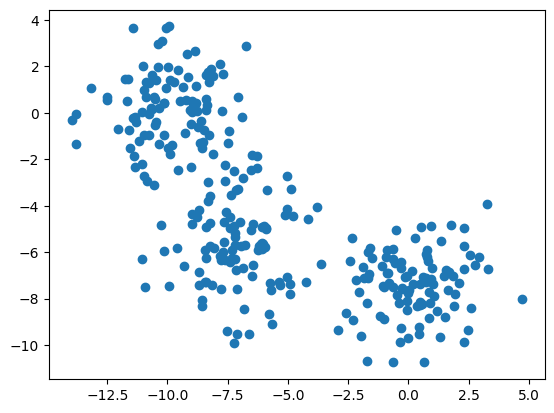

In [215]:
X, y = make_blobs(n_samples=300, cluster_std=1.5, random_state=9, center_box=(-10, 10)) #12
plt.scatter(X[:, 0], X[:, 1])
plt.show()


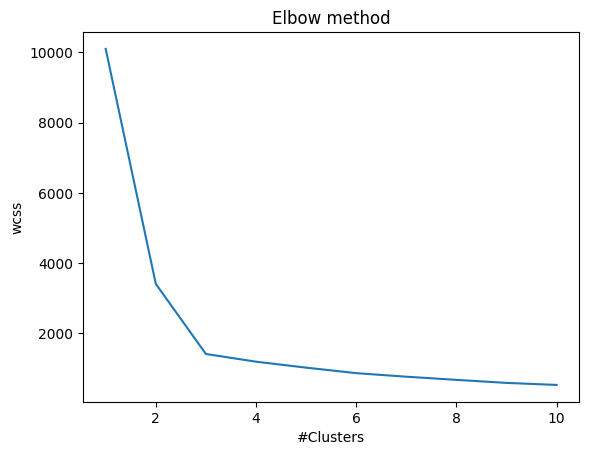

In [216]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow method')
plt.xlabel('#Clusters')
plt.ylabel('wcss')
plt.show()

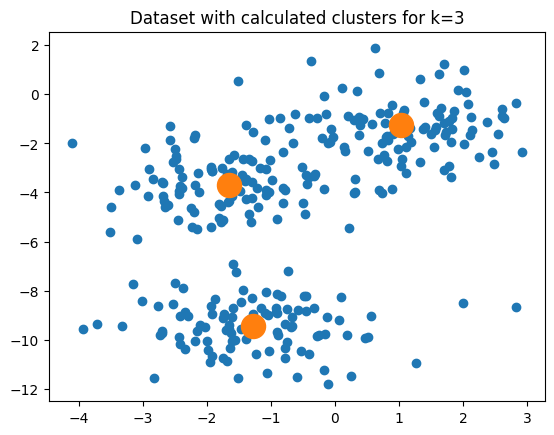

In [140]:
kmeans = KMeans(n_clusters=3)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1])
plt.title('Dataset with calculated clusters for k=3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300)

In [217]:
#gen initial centroids
rand = 12
k = 3
#init = np.random.randn(3, 2)
np.random.seed = 2
init = np.random.uniform(low=-12, high=12, size=(k,2))
init

array([[-10.67893479,  -3.61752319],
       [-11.91082222,   5.26683502],
       [ -5.74210532,  -5.9883666 ]])

In [221]:
m = 20
kmeans = KMeans(n_clusters=k, max_iter=1, init=init)
filenames = []

plt.scatter(X[:, 0], X[:, 1])
plt.title('Dataset with calculated clusters for k=3')
plt.scatter(init[:, 0], init[:, 1], s=300)

# create file name and append it to a list
filename1 = f'generated_plots/{-2}.png'
filename2 = f'generated_plots/{-1}.png'
filename3 = f'generated_plots/{0}.png'
filenames.append(filename1)
filenames.append(filename2)
filenames.append(filename3)
plt.xlim([-12, 12])
plt.ylim([-12, 12])
plt.savefig(filename1)
plt.savefig(filename2)
plt.savefig(filename3)
plt.close()


for i in range(1, m):
    
    pred_y = kmeans.fit_predict(X)

    plt.scatter(X[:, 0], X[:, 1])
    plt.title('Dataset with calculated clusters for k='+str(k))
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300)

    # create file name and append it to a list
    filename = f'generated_plots/{i}.png'
    filenames.append(filename)

    plt.xlim([-12, 12])
    plt.ylim([-12, 12])
    plt.savefig(filename)
    plt.close()
    kmeans = KMeans(n_clusters=k, max_iter=1, init=kmeans.cluster_centers_)

    
    
    
buildGIF(filenames)

C:\Users\Karl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1307: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params(X)
C:\Users\Karl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1307: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params(X)
C:\Users\Karl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1307: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params(X)
C:\Users\Karl\AppData\Local\Packages\PythonSoftwareFoundation.Py

# Utilities

In [136]:
#source: https://towardsdatascience.com/basics-of-gifs-with-pythons-matplotlib-54dd544b6f30
import os
import imageio

In [199]:
def buildGIF(filenames, delete=True):
    with imageio.get_writer('mygif.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)
    if delete:
        # Remove files
        for filename in set(filenames):
            os.remove(filename)